# Identifying Clusters in Myopic data 

### Purpose: explore the data to find distinct clusters that may be utilized in ML

Note: Distinct clusters were not readily identified, as a result there are a number of visualizations that remain in this notebook that do not directly relate to it's outcome. These cells, while not contributing to the result, have been left in to prevent future efforts from being duplicated.  


### <span style='color:green '>Setup Dependencies</span>
<span style='color:green '>Suppress Thread Management Errors</span>  
<span style='color:green '>Setup Default Matplotlib Cycle Colors</span>

In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['axes.prop_cycle'] = cycler(color=['#f2984e','#5d68b0', '#869976', '#f1bff2', '#fcba03', '#b103fc', '#03fce7'])

### <span style='color:green '>Get Our Data</span>

In [2]:
file_path = 'myopia.csv'
df = pd.read_csv(file_path)
df.sample(5)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
387,8,0.211,22.490000,3.862,3.482,15.140000,18,4,2,5,7,38,0,0,0
215,6,0.695,23.540001,3.845,3.403,16.299999,4,2,1,0,21,29,0,0,1
220,7,0.903,22.809999,3.184,3.322,16.299999,1,0,0,1,7,10,1,1,0
56,6,0.970,22.410000,3.836,3.336,15.240000,20,0,2,0,15,19,1,1,0
527,6,0.696,21.719999,3.436,3.510,14.770000,25,0,3,0,3,9,0,0,0


In [3]:
# Evaluate target information 
target_counts = df['MYOPIC'].value_counts()
print(f'Number of patients with myopia: {target_counts[1]}')
print(f'Number of patients without myopia: {target_counts[0]}')

Number of patients with myopia: 81
Number of patients without myopia: 537


### <span style='color:green '>Create a new dataframe for t-SNE and data Visualization</span>

In [4]:
# Create a new dataframe for t-SNE
# Drop Target Column from our data set for unsupervised learning
# Assign target values to variable for use in visualizations 
df2 = df.drop(['MYOPIC'], axis=1)
labels = df['MYOPIC']

### <span style='color:green '>Get aquainted with our data</span>
<span style='color:green '>Scipy Cluster Hierarchy </span>  
<span style='color:green '>Scipy Clustering w/ Normalize Scaling </span>  
<span style='color:green '>Raw Relationships</span>

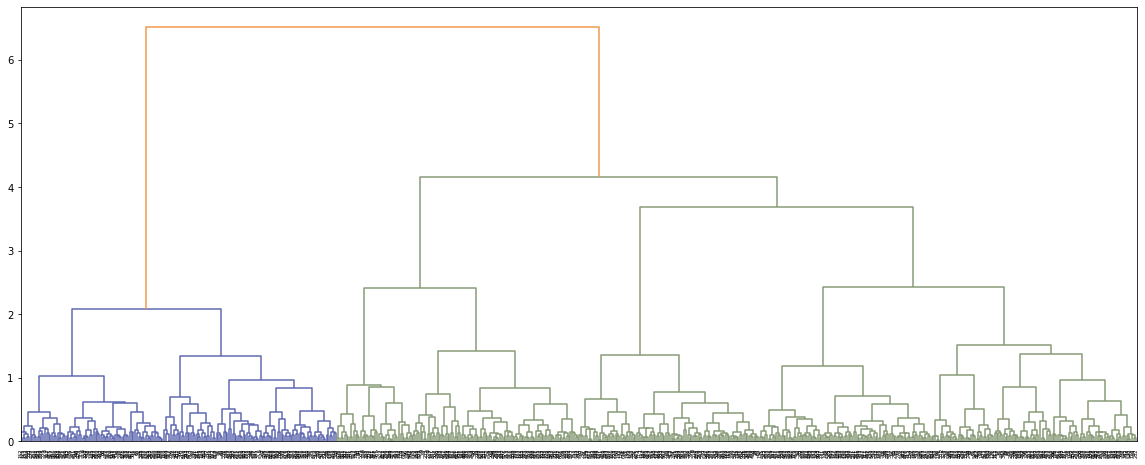

Wall time: 9.48 s


In [5]:
%%time
# Taking a look at our data with scipy cluster hierarchy 
normalized = normalize(df)
mergings = linkage(normalized, method="ward")
plt.figure(figsize=(20,8))
dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

In [6]:
df3 = pd.DataFrame(normalized)
df3.columns = df.columns
cluster = AgglomerativeClustering(
    n_clusters=2,
    affinity="euclidean",
    linkage="ward"
)
labels = cluster.fit_predict(df3)
# labels[:5] ==> array([0, 0, 0, 1, 0], dtype=int64)

### <span style='color:green '>Chart the results from our Clustering </span>  
<span style='color:green '>A visual comparison of our Normalized data </span>  
<span style='color:green '>The results suggest between 2 and 4 clusters </span>

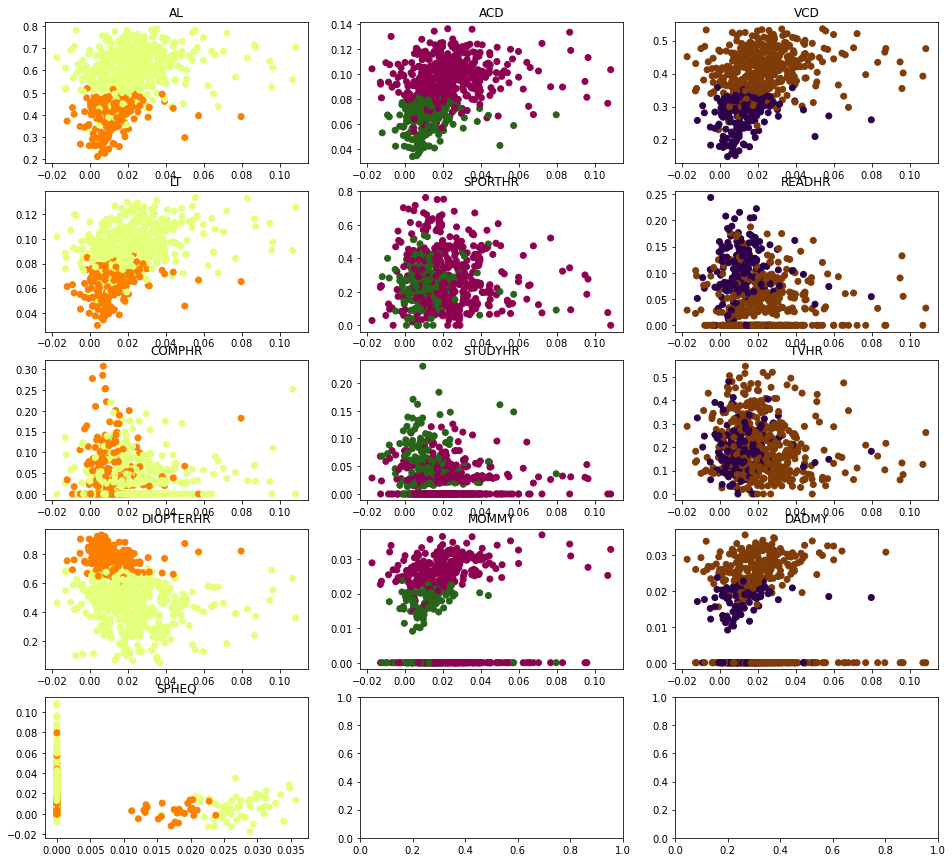

In [7]:
# Define Figure to hold all of our subplots
fig, axs = plt.subplots( nrows=5, ncols=3, figsize=(16, 15))

# Build some quick plots to get a look at our data after it was normailized
# The Speaq had the strongest "apparent correlation" in the data and was used as x in each visualization 
# The color is defined by our original target column 
axs[0,0].scatter(x=df3['SPHEQ'], y=df3['AL'], c=labels, cmap='Wistia')
axs[0,0].set_title('AL')
axs[0,1].scatter(x=df3["SPHEQ"], y=df3['ACD'], c=labels, cmap='PiYG')
axs[0,1].set_title('ACD')
axs[0,2].scatter(x=df3["SPHEQ"], y=df3['VCD'], c=labels, cmap='PuOr')
axs[0,2].set_title('VCD')
axs[1,0].scatter(x=df3["SPHEQ"], y=df3['LT'], c=labels, cmap='Wistia')
axs[1,0].set_title('LT')
axs[1,1].scatter(x=df3["SPHEQ"], y=df3['SPORTHR'], c=labels, cmap='PiYG')
axs[1,1].set_title('SPORTHR')
axs[1,2].scatter(x=df3["SPHEQ"], y=df3['READHR'], c=labels, cmap='PuOr')
axs[1,2].set_title('READHR')
axs[2,0].scatter(x=df3["SPHEQ"], y=df3['COMPHR'], c=labels, cmap='Wistia')
axs[2,0].set_title('COMPHR')
axs[2,1].scatter(x=df3["SPHEQ"], y=df3['STUDYHR'], c=labels, cmap='PiYG')
axs[2,1].set_title('STUDYHR')
axs[2,2].scatter(x=df3["SPHEQ"], y=df3['TVHR'], c=labels, cmap='PuOr')
axs[2,2].set_title('TVHR')
axs[3,0].scatter(x=df3["SPHEQ"], y=df3['DIOPTERHR'], c=labels, cmap='Wistia')
axs[3,0].set_title('DIOPTERHR')
axs[3,1].scatter(x=df3["SPHEQ"], y=df3['MOMMY'], c=labels, cmap='PiYG')
axs[3,1].set_title('MOMMY')
axs[3,2].scatter(x=df3["SPHEQ"], y=df3['DADMY'], c=labels, cmap='PuOr')
axs[3,2].set_title('DADMY')
# To View sherq directly against orginal target 
axs[4,0].scatter(x=df3["MYOPIC"], y=df3['SPHEQ'], c=labels, cmap='Wistia')
axs[4,0].set_title('SPHEQ')
plt.show()

## <span style='color:green '> Scale </span>
<span style='color:green '>Scale with Sklearn Standard Scaler</span>

In [8]:
# Standarize data with StandarScaler
df2s = StandardScaler().fit_transform(df2)
print(df2s[0:1])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]]


## <span style='color:green '>PCA</span>
<span style='color:green '>Applying PCA to reduce dimensions while preserving 90% of the explained variance </span>


In [9]:
# Applying PCA to reduce dimensions while preserving 90% of the explained variance 
# Initialize PCA model by setting n-components to desired level
pca = PCA(n_components= .90)

# Fit our new Principal Component Analysis reduced Features to our Model
myo_pca = pca.fit_transform(df2s)

<span style='color:green '>At a setting to preserve 90% of the explained variance in the reduction the number of feature is reduced from 14 to 10</span>

In [10]:
# Transform PCA data to a DataFrame
df_myo_pca = pd.DataFrame(data=myo_pca)
df_myo_pca.head(2)

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031


In [11]:
# Fetch the explained variance
# pca.explained_variance_ratio_  ==>>array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
#        0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

### <span style='color:green '> K-Means</span>

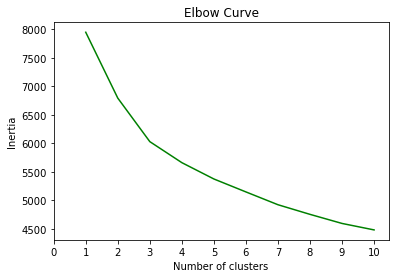

In [12]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myo_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'], c='green')
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

<span style='color:green '>Based on the elbow curve above it seems the best value for k might be 3</span>  
<span style='color:green '>Because our elbow is not difinitive we will look at the 'k' value in another way.</span>
#### <span style='color:green '> K-Means elbow curve respresented as a scatter plot</span>
<span style='color:green '> First Pair of plots show the final value of k=10</span>  
<span style='color:green '> The Next 2 plots are the most likely two values of 2 or 3</span>

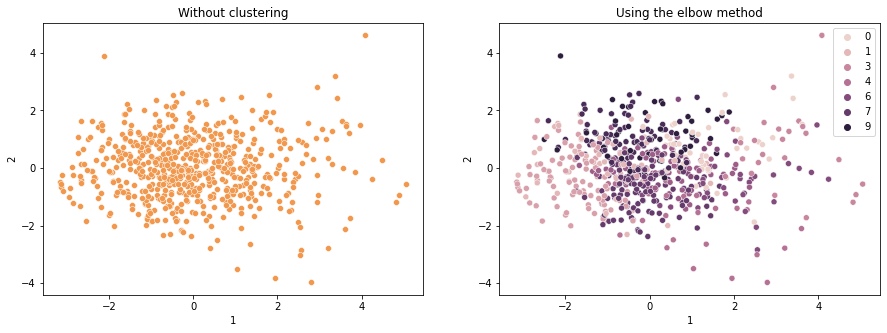

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2]).set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2],
    hue=km.labels_).set_title('Using the elbow method');

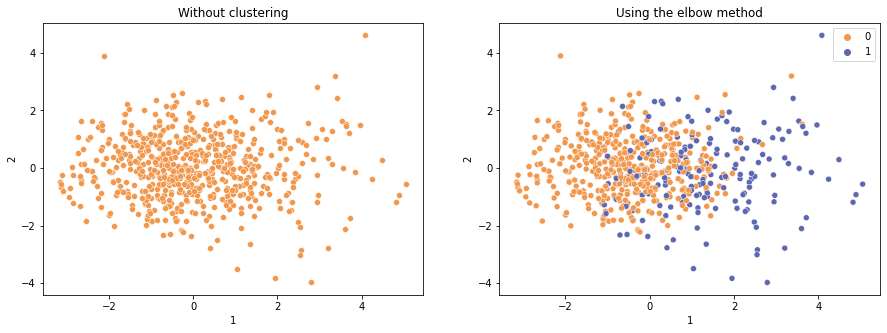

In [14]:
# Take a look at k=2

# Initializing model with K = 2 (since there are two options Myopic and Not Myopic)
model = KMeans(n_clusters=2, random_state=1)
# Fitting model
model.fit(df2)
# Get predictions
predictions = model.predict(df2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2]).set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2],
    hue=model.labels_).set_title('Using the elbow method');

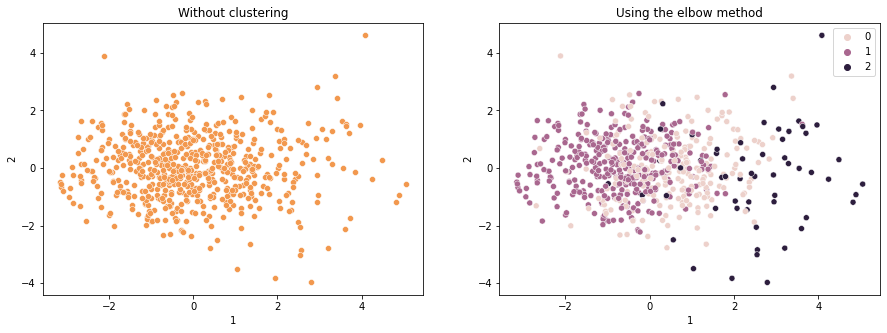

In [15]:
# Take a look at k=3

# Initializing model with K = 3 (since there are two options Myopic and Not Myopic)
model = KMeans(n_clusters=3, random_state=1)
# Fitting model
model.fit(df2)
# Get predictions
predictions = model.predict(df2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2]).set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df_myo_pca, x=df_myo_pca[1], y=df_myo_pca[2],
    hue=model.labels_).set_title('Using the elbow method');

### <span style='color:green '>This Group of Charts is with Standard Scaling and PCA Applied </span>
<span style='color:green '>Below is a group of scatter charts for a better view of our data </span>  
<span style='color:green '>Looking for any new patterns within the modified features </span>  
<span style='color:green '>No specific patterns in the data revealed themself </span>  

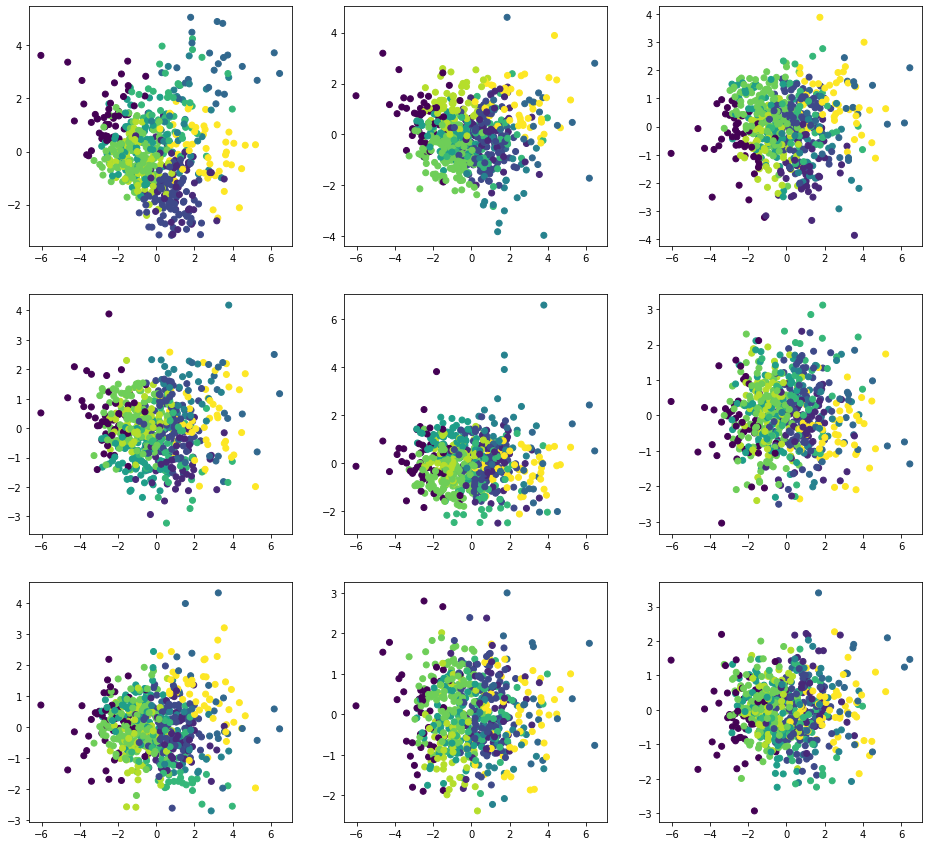

In [16]:
# Define Figure to hold all of our subplots
fig, axs = plt.subplots( nrows=3, ncols=3, figsize=(16, 15))

# Build some quick plots to get a look at our reduced data
# The first reduced feature in the data and was used as x in each
# visualization.  This selection was random 
# The color is defined by our K-means results
axs[0,0].scatter(x=df_myo_pca[0], y=df_myo_pca[1], c=km.labels_)
axs[0,1].scatter(x=df_myo_pca[0], y=df_myo_pca[2], c=km.labels_)
axs[0,2].scatter(x=df_myo_pca[0], y=df_myo_pca[3], c=km.labels_)
axs[1,0].scatter(x=df_myo_pca[0], y=df_myo_pca[4], c=km.labels_)
axs[1,1].scatter(x=df_myo_pca[0], y=df_myo_pca[5], c=km.labels_)
axs[1,2].scatter(x=df_myo_pca[0], y=df_myo_pca[6], c=km.labels_)
axs[2,0].scatter(x=df_myo_pca[0], y=df_myo_pca[7], c=km.labels_)
axs[2,1].scatter(x=df_myo_pca[0], y=df_myo_pca[8], c=km.labels_)
axs[2,2].scatter(x=df_myo_pca[0], y=df_myo_pca[9], c=km.labels_)
plt.show()

#### <span style='color:green '>The new charts above show a more even distribution of Features</span>
<span style='color:green '>No help in identifying clusters </span>

In [17]:
# Initializing model with K = 2 (since there are two options Myopic and Not Myopic)
model = KMeans(n_clusters=3, random_state=1)
# Fitting model
model.fit(df2)
# Get predictions
predictions = model.predict(df2)
# print(predictions)
# print(model.labels_)

In [18]:
# Add a new class column to DF2
df2["MYOPIC"] = model.labels_
df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,0
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,1
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,0
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,1


## <span style='color:green '>t-SNE (t-distributed stochastic neighbor embedding)</span>
<span style='color:green '> </span>

In [19]:
# Initialize t-SNE
tsne = TSNE(learning_rate=5, perplexity=30.0, random_state=1)
# tsne = TSNE(learning_rate=35, random_state=10)

In [20]:
tsne_features = tsne.fit_transform(df2)
tsne_features.shape
tsne_features

array([[ 12.210014  , -14.005888  ],
       [-21.718363  ,  -3.3433094 ],
       [ -9.818121  ,  -4.9585395 ],
       ...,
       [-23.775063  , -10.887472  ],
       [  2.0087044 ,   0.13591939],
       [ -5.676357  , -15.677462  ]], dtype=float32)

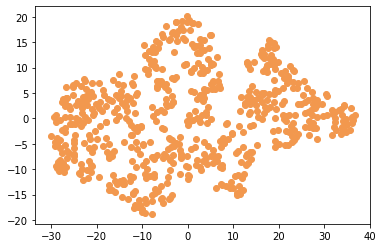

In [21]:
# Prepare and plot the dataset
# Assign tsne features to x and y axis'
df2['x'] = tsne_features[:,0]
df2['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(df2['x'], df2['y'])
plt.show()

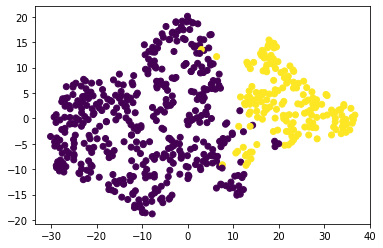

In [22]:
# Visualize the clusters with color
plt.scatter(df2['x'], df2['y'], c=labels)
plt.show()

## <span style='color:green '>Can Patients be Clusterd??</span>
### <span style='color:green '>If so how many Clusters??</span>

Narrowed it down to... 
There may be two or three clusters, but there is not clear and convincing evidence that there are disinct clusters. 
We may want to try different scalers. 
We may try other attributes for t-SNE and see if distinct groups emerge. 
We did some additional ananlysis on K-means to see if we could identify ditinct clusters. 
##### Recommendation
Is there enough data or do some of our columns harm our learning set. 
We may need to see if there are some columns that we should drop or additional information we need to add.
We could also look at additional clustering algorithms

Affinity Propagation,
Agglomerative Clustering,
BIRCH,
DBSCAN,
Mini-Batch K-Means,
Mean Shift,
OPTICS,
Spectral Clustering,
Mixture of Gaussians.